In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
!pip install --upgrade facets-overview
!pip install tensorflow
!pip install --upgrade pip

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ------------------- -------------------- 0.7/1.5 MB 22.5 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/181.3 kB ? eta -:--:--
     ---------------------------------------- 181.3/181.3 kB ? eta 0:00:00
     ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
     ---------------------------------------- 83.9/83.9 kB ? eta 0:00:00
     ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
     -------------------------------------- 151.7/151.7 kB 8.8 MB/s eta 0:00:00
   -------------------------

In [20]:

import tensorflow as tf
import tensorflow.compat.v1 as tf1
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator


In [3]:
readIn = pd.read_csv("training_data.csv")
df = pd.DataFrame(readIn)

In [21]:
#@title Visualize the Data in Facets 1
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

NameError: name 'base64' is not defined

In [ ]:
#@title Set the Number of Data Points to Visualize in Facets Dive

SAMPLE_SIZE = 5000 #@param

train_dive = df.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

In [4]:
readIn = pd.read_csv("data_submission_example.csv")
df_target = pd.DataFrame(readIn)
df_target.head(20)

df['CONTRACT_CREDIT_INTERMEDIARY'].value_counts()


CONTRACT_CREDIT_INTERMEDIARY
2.0        1069644
1.0         454073
20001.0      18654
0.0            960
Name: count, dtype: int64

<Axes: >

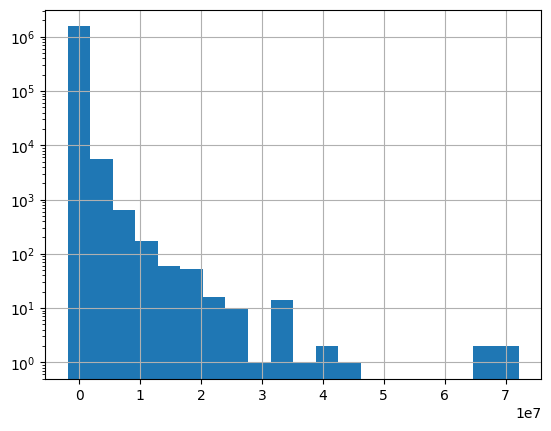

In [7]:
df['CONTRACT_CREDIT_LOSS'].hist(bins=20, log=True)

In [8]:
df['CONTRACT_CREDIT_LOSS'].value_counts()

CONTRACT_CREDIT_LOSS
0.0         389125
206027.0      3664
731521.0       635
2442.0         531
3909.0         457
             ...  
67806.0          1
551479.0         1
127895.0         1
75259.0          1
671335.0         1
Name: count, Length: 165007, dtype: int64

In [11]:
df['CONTRACT_CREDIT_LOSS'].max()

72113003.0

3 évnyi adatunk amikor felvettek hiteleket. Angliából...?


valamikor felveszik a hitelt és az elkezd telni (valamikori lejárat, nem tudjuk, lehet intervallumon belül)

TARGET_EVENT
- nem történt semmi
- előtörlesztették -- teljesen!!!
- bedőlt

egy hitelhez több emberhez is tartozhat
- kevés információt tudunk róla... probs gdpr

**ingatlan értéke van akkor kitöltve ha!!! ez egy ingatlan hitel**

ksh oldalán akár lehet nyomozgatni hogy melyik hiteltípus mi lehet


doppingvizsgálat: az elsők kódját meglesik

--- folytatjuk tovább még az időt.... a hitelek továbbfolytatását látjuk. (itt már nem indulnak hitelek) azt vizsgáljuk

osztályozási feladat.

egy pointig ismerjük az adatokat és a tesztidőintervallumról nem tudunk semmit


baseline: 0.06-0.07 között logloss

1.48 % a bedőlők aránya

50-50% publik és private csv fileban


ezek mind átmentek egy hitelbírálaton már... Továbbfinomítjuk a modellt!!!

azokkal foglalkozunk akik az első évben indítottak hitelt

    'CONTRACT_ID',
    'BORROWER_ID',
    'CONTRACT_BANK_ID',
    'CONTRACT_CREDIT_INTERMEDIARY',
    'CONTRACT_CREDIT_LOSS',
    'CONTRACT_CURRENCY',
    'CONTRACT_DATE_OF_LOAN_AGREEMENT',
    'CONTRACT_DEPT_SERVICE_TO_INCOME',
    'CONTRACT_FREQUENCY_TYPE',
    'CONTRACT_INCOME',
    'CONTRACT_INSTALMENT_AMOUNT',
    'CONTRACT_INSTALMENT_AMOUNT_2',
    'CONTRACT_INTEREST_PERIOD',
    'CONTRACT_INTEREST_RATE',
    'CONTRACT_LGD',
    'CONTRACT_LOAN_AMOUNT',
    'CONTRACT_LOAN_CONTRACT_TYPE',
    'CONTRACT_LOAN_TO_VALUE_RATIO',
    'CONTRACT_LOAN_TYPE',
    'CONTRACT_MARKET_VALUE',
    'CONTRACT_MATURITY_DATE',
    'CONTRACT_MORTGAGE_LENDING_VALUE',
    'CONTRACT_MORTGAGE_TYPE',
    'CONTRACT_REFINANCED',
    'CONTRACT_RISK_WEIGHTED_ASSETS',
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
    'BORROWER_BIRTH_YEAR',
    'BORROWER_CITIZENSHIP',
    'BORROWER_COUNTRY',
    'BORROWER_COUNTY',
    'BORROWER_TYPE_OF_CUSTOMER',
    'BORROWER_TYPE_OF_SETTLEMENT',
    'TARGET_EVENT',
    'TARGET_EVENT_DAY'

In [27]:
df.head(20)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [28]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()

2457024

In [29]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].max()

2458118

In [30]:
df2=df[df['CONTRACT_DATE_OF_LOAN_AGREEMENT']<2457389]

In [31]:
len(df2)

499724

függvény ami agregál rá

<Axes: >

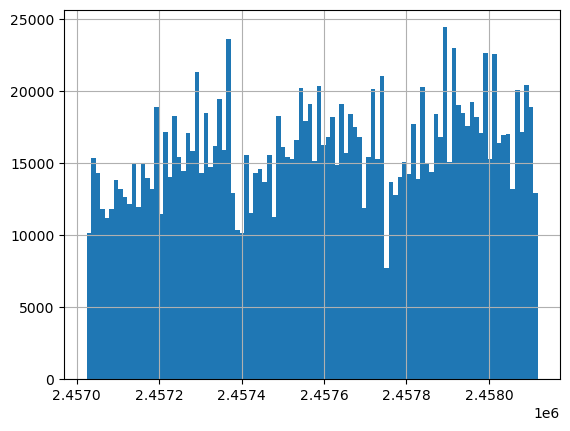

In [32]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].hist(bins=100)

az első 365 napot hasznmáljuk

aztán az utolsó 365tel ott nincs célváltozó

modelt csinálunk belőle és ráengedjük a beküldőre

In [34]:
def datagen_modeA(df, startnap, endnap):
    df[df['CONTRACT_DATE_OF_LOAN_AGREEMENT']<2457024+endnap && df['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=2457024+startnap].copy()
    
    cust_df=pd.DataFrame({'BORROWER_ID': df['BORROWER_ID'].unique()})
    
    target_df=origdf[origdf['Contr']]
    
R1= datafen_modeA(df, 0, 365)
R2= datafen_modeA(df, 365*2, 365*3)

SyntaxError: invalid syntax (2445702810.py, line 2)